In [1]:
# %load ../../../load_magic/storage.py

!mkdir ../../data
!mkdir ../../data/csv
!mkdir ../../saves
!mkdir ../../saves/pickle
!mkdir ../../saves/csv
import pickle
import pandas as pd
import os
import numpy as np
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

# Handy list of the different types of encodings
encoding = ['latin1', 'iso8859-1', 'utf-8'][2]

# Change this to your data and saves folders
data_folder = r'../../data/'
saves_folder = r'../../saves/'

def load_csv(csv_name=None, folder_path=None):
    if folder_path is None:
        csv_folder = data_folder + 'csv/'
    else:
        csv_folder = folder_path + 'csv/'
    if csv_name is None:
        csv_path = max([os.path.join(csv_folder, f) for f in os.listdir(csv_folder)],
                       key=os.path.getmtime)
    else:
        csv_path = csv_folder + csv_name + '.csv'
    data_frame = pd.read_csv(csv_path, encoding=encoding)
    
    return(data_frame)

def load_dataframes(**kwargs):
    frame_dict = {}
    for frame_name in kwargs:
        pickle_path = saves_folder + 'pickle/' + frame_name + '.pickle'
        if not os.path.isfile(pickle_path):
            csv_folder = saves_folder + 'csv/'
            csv_path = csv_folder + frame_name + '.csv'
            if not os.path.isfile(csv_path):
                csv_path = data_folder + 'csv/' + frame_name + '.csv'
                if not os.path.isfile(csv_path):
                    frame_dict[frame_name] = None
                else:
                    frame_dict[frame_name] = load_csv(csv_name=frame_name)
            else:
                frame_dict[frame_name] = load_csv(csv_name=frame_name, folder_path=csv_folder)
        else:
            frame_dict[frame_name] = load_object(frame_name)
    
    return frame_dict

def load_object(obj_name):
    pickle_path = saves_folder + 'pickle/' + obj_name + '.pickle'
    try:
        object = pd.read_pickle(pickle_path)
    except:
        with open(pickle_path, 'rb') as handle:
            object = pickle.load(handle)
    
    return(object)

def save_dataframes(include_index=False, **kwargs):
    csv_folder = saves_folder + 'csv/'
    for frame_name in kwargs:
        if isinstance(kwargs[frame_name], pd.DataFrame):
            csv_path = csv_folder + frame_name + '.csv'
            kwargs[frame_name].to_csv(csv_path, sep=',', encoding=encoding,
                                      index=include_index)

# Classes, functions, and methods cannot be pickled
def store_objects(**kwargs):
    for obj_name in kwargs:
        if hasattr(kwargs[obj_name], '__call__'):
            raise RuntimeError('Functions cannot be pickled.')
        obj_path = saves_folder + 'pickle/' + str(obj_name)
        pickle_path = obj_path + '.pickle'
        if isinstance(kwargs[obj_name], pd.DataFrame):
            kwargs[obj_name].to_pickle(pickle_path)
        else:
            with open(pickle_path, 'wb') as handle:
                pickle.dump(kwargs[obj_name], handle, pickle.HIGHEST_PROTOCOL)

mkdir: ../../data: File exists
mkdir: ../../data/csv: File exists
mkdir: ../../saves: File exists
mkdir: ../../saves/pickle: File exists
mkdir: ../../saves/csv: File exists


In [5]:

frame_dict = load_dataframes(nesarc_pds='nesarc_pds')
nesarc_pds_df = frame_dict['nesarc_pds']
store_objects(nesarc_pds_df=nesarc_pds_df)
nesarc_pds_df.sample(4).T

/Users/davebabbitt/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2910: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,8545,2337,37214,5752
ETHRACE2A,1,5,1,2
ETOTLCA2,,0.1305,0.0016,3.6
IDNUM,8546,2338,37215,5753
PSU,49006,48990,12025,13052
STRATUM,4904,4826,1205,1301
WEIGHT,7186.59,1460.79,6982.04,4385.77
CDAY,2,29,17,11
CMON,10,11,11,10
CYEAR,2001,2001,2001,2001
REGION,4,3,3,3


In [6]:

# Set variables you will be working with to numeric
nesarc_pds_df['TAB12MDX'] = pd.to_numeric(nesarc_pds_df['TAB12MDX'], errors='coerce')
nesarc_pds_df['CHECK321'] = pd.to_numeric(nesarc_pds_df['CHECK321'], errors='coerce')
nesarc_pds_df['S3AQ3B1'] = pd.to_numeric(nesarc_pds_df['S3AQ3B1'], errors='coerce')
nesarc_pds_df['S3AQ3C1'] = pd.to_numeric(nesarc_pds_df['S3AQ3C1'], errors='coerce')
nesarc_pds_df['AGE'] = pd.to_numeric(nesarc_pds_df['AGE'], errors='coerce')

In [7]:

# Subset nesarc_pds_df to young adults age 18 to 25 who have smoked in the past 12 months
match_series = (nesarc_pds_df['AGE']>=18) & (nesarc_pds_df['AGE']<=25) & (nesarc_pds_df['CHECK321']==1)
sub1 = nesarc_pds_df[match_series]

In [8]:

# Make a copy of my new subsetted nesarc_pds_df
sub2 = sub1.copy()

In [9]:

# Recode missing values to python missing (NaN)
sub2['S3AQ3B1'] = sub2['S3AQ3B1'].replace(9, np.nan)
sub2['S3AQ3C1'] = sub2['S3AQ3C1'].replace(99, np.nan)

In [19]:

# Recoding values for S3AQ3B1 into a new variable, USFREQMO
recode1 = {1: 30, 2: 22, 3: 14, 4: 6, 5: 2.5, 6: 1}
sub2['USFREQMO'] = sub2['S3AQ3B1'].map(recode1)

In [11]:

# Contingency table of observed counts
ct1 = pd.crosstab(sub2['TAB12MDX'], sub2['USFREQMO'])
print(ct1)

USFREQMO  1.0   2.5   6.0   14.0  22.0  30.0
TAB12MDX                                    
0           64    53    69    59    41   521
1            7    12    19    32    27   799


In [12]:

# Column percentages
colsum = ct1.sum(axis=0)
colpct = ct1/colsum
print(colpct)

USFREQMO      1.0       2.5       6.0       14.0      22.0      30.0
TAB12MDX                                                            
0         0.901408  0.815385  0.784091  0.648352  0.602941  0.394697
1         0.098592  0.184615  0.215909  0.351648  0.397059  0.605303


In [13]:

# Chi-square
print('chi-square value, p value, expected counts')
cs1 = scipy.stats.chi2_contingency(ct1)
print(cs1)

chi-square value, p value, expected counts
(165.27320708055845, 7.4363642083905987e-34, 5, array([[  33.64474457,   30.80152672,   41.70052848,   43.1221374 ,
          32.22313564,  625.50792719],
       [  37.35525543,   34.19847328,   46.29947152,   47.8778626 ,
          35.77686436,  694.49207281]]))


In [26]:

# Set variable types
sub2['USFREQMO'] = sub2['USFREQMO'].astype('category')

# New code for setting variables to numeric:
sub2['TAB12MDX'] = pd.to_numeric(sub2['TAB12MDX'], errors='coerce')

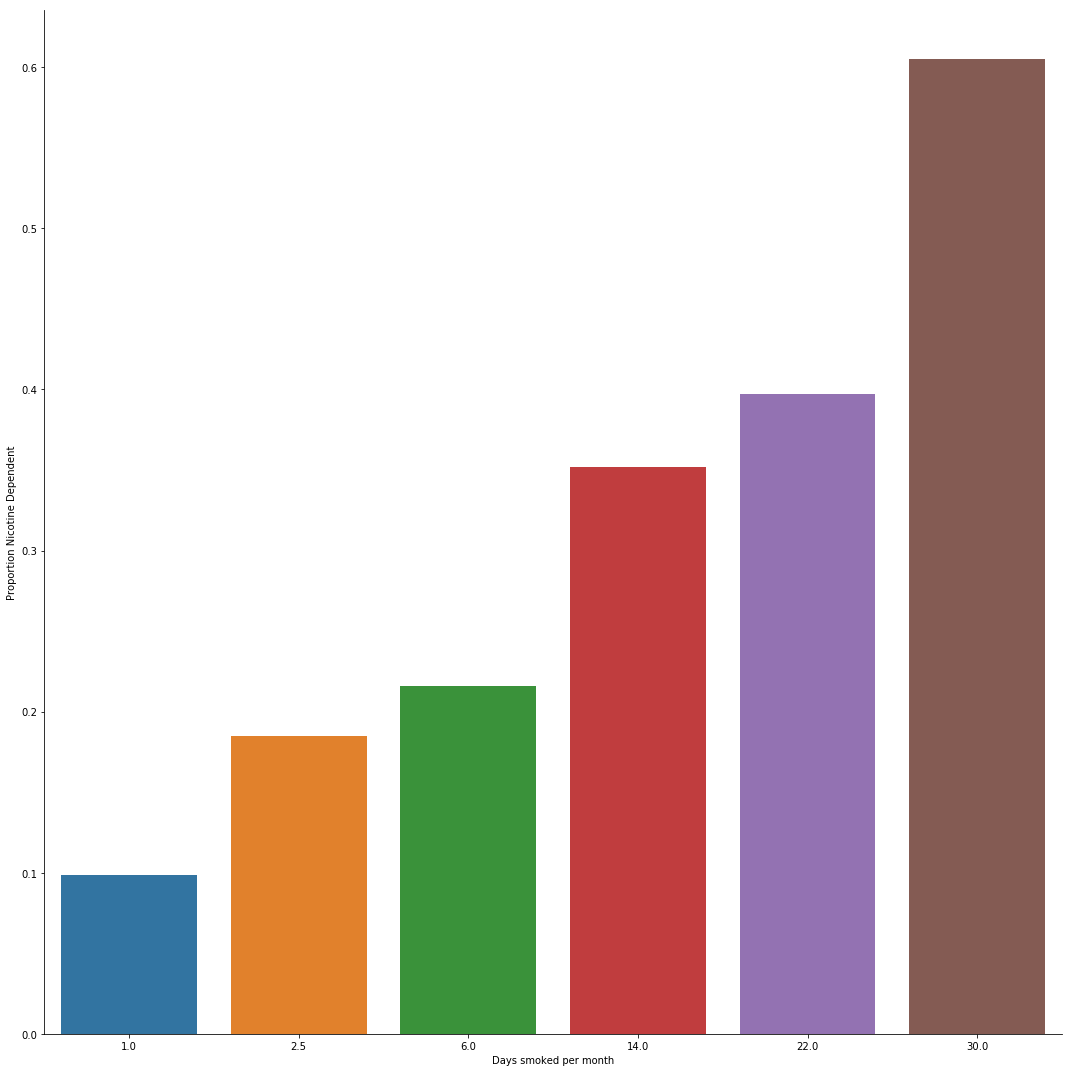

In [31]:

%matplotlib inline

# Graph percent with nicotine dependence within each smoking frequency group
facet_grid = seaborn.factorplot(x='USFREQMO', y='TAB12MDX', data=sub2, kind='bar', ci=None, size=15)
xlabel = plt.xlabel('Days smoked per month')
ylabel = plt.ylabel('Proportion Nicotine Dependent')

In [32]:

recode2 = {1: 1, 2.5: 2.5}
sub2['COMP1v2'] = sub2['USFREQMO'].map(recode2)

In [33]:

# Contingency table of observed counts
ct2 = pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v2'])
print(ct2)

COMP1v2   1.0  2.5
TAB12MDX          
0          64   53
1           7   12


In [34]:

# Column percentages
colsum = ct2.sum(axis=0)
colpct = ct2/colsum
print(colpct)

COMP1v2        1.0       2.5
TAB12MDX                    
0         0.901408  0.815385
1         0.098592  0.184615


In [36]:

print('The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)')
cs2 = scipy.stats.chi2_contingency(ct2)
print(cs2)

The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)
(1.4348930637007287, 0.23096754489777169, 1, array([[ 61.08088235,  55.91911765],
       [  9.91911765,   9.08088235]]))


In [37]:

recode3 = {1: 1, 6: 6}
sub2['COMP1v6'] = sub2['USFREQMO'].map(recode3)

In [38]:

# Contingency table of observed counts
ct3 = pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v6'])
print(ct3)

COMP1v6   1.0  6.0
TAB12MDX          
0          64   69
1           7   19


In [39]:

# Column percentages
colsum = ct3.sum(axis=0)
colpct = ct3/colsum
print(colpct)

COMP1v6        1.0       6.0
TAB12MDX                    
0         0.901408  0.784091
1         0.098592  0.215909


In [40]:

print('The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)')
cs3 = scipy.stats.chi2_contingency(ct3)
print(cs3)

The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)
(3.1428401912209361, 0.076260901982868209, 1, array([[ 59.38993711,  73.61006289],
       [ 11.61006289,  14.38993711]]))


In [41]:

recode4 = {1: 1, 14: 14}
sub2['COMP1v14'] = sub2['USFREQMO'].map(recode4)

In [42]:

# Contingency table of observed counts
ct4 = pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v14'])
print(ct4)

COMP1v14  1.0   14.0
TAB12MDX            
0           64    59
1            7    32


In [43]:

# Column percentages
colsum = ct4.sum(axis=0)
colpct = ct4/colsum
print(colpct)

COMP1v14      1.0       14.0
TAB12MDX                    
0         0.901408  0.648352
1         0.098592  0.351648


In [44]:

print('The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)')
cs4 = scipy.stats.chi2_contingency(ct4)
print(cs4)

The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)
(12.622564075461572, 0.00038111819882681824, 1, array([[ 53.90740741,  69.09259259],
       [ 17.09259259,  21.90740741]]))


In [53]:

recode5 = {1: 1, 22: 22}
sub2['COMP1v22'] = sub2['USFREQMO'].map(recode5)

In [56]:

# Contingency table of observed counts
ct5 = pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v22'])
print(ct5)

COMP1v22  1.0   22.0
TAB12MDX            
0           64    41
1            7    27


In [57]:

# Column percentages
colsum = ct5.sum(axis=0)
colpct = ct5/colsum
print(colpct)

COMP1v22      1.0       22.0
TAB12MDX                    
0         0.901408  0.602941
1         0.098592  0.397059


In [58]:

print('The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)')
cs5 = scipy.stats.chi2_contingency(ct5)
print(cs5)

The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)
(15.169488833230059, 9.8278652913185008e-05, 1, array([[ 53.63309353,  51.36690647],
       [ 17.36690647,  16.63309353]]))


In [59]:

recode6 = {1: 1, 30: 30}
sub2['COMP1v30'] = sub2['USFREQMO'].map(recode6)

In [60]:

# Contingency table of observed counts
ct6 = pd.crosstab(sub2['TAB12MDX'], sub2['COMP1v30'])
print(ct6)

COMP1v30  1.0   30.0
TAB12MDX            
0           64   521
1            7   799


In [61]:

# Column percentages
colsum = ct6.sum(axis=0)
colpct = ct6/colsum
print(colpct)

COMP1v30      1.0       30.0
TAB12MDX                    
0         0.901408  0.394697
1         0.098592  0.605303


In [62]:

print('The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)')
cs6 = scipy.stats.chi2_contingency(ct6)
print(cs6)

The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)
(68.924718744884871, 1.0229460827061155e-16, 1, array([[  29.85981308,  555.14018692],
       [  41.14018692,  764.85981308]]))


[2.5, 6.0, 14.0, 22.0, 30.0]

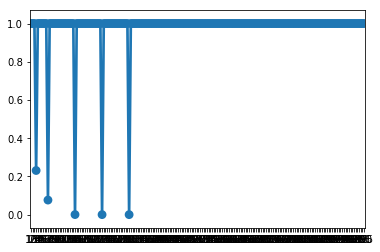

In [67]:

x = [n for n in range(10, 1000, 5)]
y = [scipy.stats.chi2_contingency(pd.crosstab(sub2['TAB12MDX'], sub2['USFREQMO'].map({1: 1, n/10: n/10})))[1] for n in x]
axes_subplot = seaborn.pointplot(x, y)

[x/10 for (x, y) in zip(x, y) if y != 1.0]

In [63]:

recode7 = {2.5: 2.5, 6: 6}
sub2['COMP2v6'] = sub2['USFREQMO'].map(recode7)

In [64]:

# Contingency table of observed counts
ct7 = pd.crosstab(sub2['TAB12MDX'], sub2['COMP2v6'])
print(ct7)

COMP2v6   2.5  6.0
TAB12MDX          
0          53   69
1          12   19


In [65]:

# Column percentages
colsum = ct7.sum(axis=0)
colpct = ct7/colsum
print(colpct)

COMP2v6        2.5       6.0
TAB12MDX                    
0         0.815385  0.784091
1         0.184615  0.215909


In [66]:

print('The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)')
cs7 = scipy.stats.chi2_contingency(ct7)
print(cs7)

The test statistic, The p-value of the test, Degrees of freedom, The expected frequencies (based on the marginal sums of the table)
(0.074305610769452662, 0.78516797297006047, 1, array([[ 51.83006536,  70.16993464],
       [ 13.16993464,  17.83006536]]))
